In [71]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial        import Delaunay

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

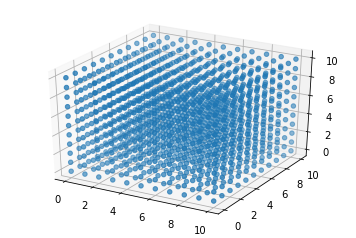

In [63]:
# Creates the grid data

size   = 11
ncells = size**3

x = []
y = []
z = []

boundary = []

index = 0
const = 1.0

for i in range(size):
    for j in range(size):
        for k in range(size):
            x.append(i*const)
            y.append(j*const)
            z.append(k*const)
            if (i == 0 or i == size-1 or j == 0 or j == size-1 or k == 0 or k == size-1):
                boundary.append(index)
            index += 1

# Create nearest neighbors list

points = [[x[i], y[i], z[i]] for i in range(ncells)]

# Lime points are Voronoi cell centers = Delaunay vertices
# Neighboring Delaunay vertices = neighboring Voronoi cells

delaunay = Delaunay(points)
(indptr,indices) = delaunay.vertex_neighbor_vertices

neighbors  = [indices[indptr[k]:indptr[k+1]] for k in range(ncells)]
nNeighbors = [len(neighbors[i]) for i in range(ncells)]


# Format the neighbors lists

neighbors_format = np.zeros((ncells,max(nNeighbors)))
for p in range(ncells):
    for n in range(nNeighbors[p]):
        neighbors_format[p][n] = neighbors[p][n]


# Write the new grid data

inputFile = 'input/'

zeros = np.zeros(ncells)
ones  = np.ones(ncells)

abundance       = ones
density         = ones
temperature_gas = ones

vx = zeros
vy = zeros
vz = zeros

txtgrid = np.stack((x, y, z, vx, vy, vz),                        axis=1)
txtabun = np.stack((zeros, abundance, density, abundance, ones), axis=1)

np.savetxt(inputFile+'cells.txt',       txtgrid,          fmt='%lE\t%lE\t%lE\t%lE\t%lE\t%lE')
np.savetxt(inputFile+'n_neighbors.txt', nNeighbors,       fmt='%ld')
np.savetxt(inputFile+'abundance.txt',   txtabun,          fmt='%lE\t%lE\t%lE\t%lE\t%lE')
np.savetxt(inputFile+'temperature.txt', temperature_gas,  fmt='%lE')
np.savetxt(inputFile+'boundary.txt',    boundary,         fmt='%ld')

# Different format for neighbors which was variable line lengths

with open(inputFile+'neighbors.txt', 'w') as file:
    for p in range(ncells):
        line = ''
        for neighbor in neighbors[p]:
            line += '{}\t'.format(neighbor)
        line += '\n'
        file.write(line)
            
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

In [66]:
def printcoords(p):
    print('{}   {}   {}'.format(x[p], y[p], z[p]))

In [67]:
o = 0

for neighbor in neighbors[o]: printcoords(neighbor)
    
x_n  = [x[p] for p in neighbors[o]]
y_n  = [y[p] for p in neighbors[o]]
z_n  = [z[p] for p in neighbors[o]]

1.0   0.0   1.0
1.0   0.0   0.0
0.0   0.0   1.0
1.0   1.0   0.0
0.0   1.0   0.0


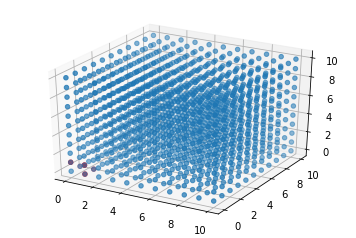

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
ax.scatter(x_n, y_n, z_n, color='red')

In [47]:
len(neighbors[37])

IndexError: list index out of range

In [10]:
printcoords(37)

2.0   1.0   1.0


In [40]:
pwd

'/home/frederik/Dropbox/Astro/Magritte/modules/Lines/examples/example_data/iteration_LTE'

In [73]:
os.system('echo epr')

0